# Analysis

$
u(c) = \sqrt{c}
$
where the utility $u$ is the square root of spending $c$.  
  
The dividend depends on the a Markov Chain.  
The state space is $S \in \{Expansion,Recession\}$. Transition Matrix:
$T=\left(\begin{array}{cc} 
.8 & .2\\ 
.5 & .5
\end{array}\right)$.  
When expansion, the dividend is 5, and when recession, the dividend is 1.

We consider the interest, interest rate $r$ is 0.05. 

Supposing the total saving (money), dividend, cost, utility at time $t$ are $M_t, D_t, C_t, U_t$ respectively.   
The probabilities vector for expansion and recession at time $t$ is $P_t$. $P_t[0]$ is the expansion probability at time $t$, $P_t[1]$ is the recession probability at time $t$.   

At beginning, we have $x$ in our saving
$$
M_0 = x
$$

For time $t$ where $t \geq 1$, the saving a person can spend is 
$$
M_t = 1.05 \times (M_{t-1} - C_{t-1}) + D_t
$$
Where $D_t$ has $P_t[0]$ to be 5 and $P_t[1]$ to be 1, that means we have 2 sub-problems to consider here. They are
$$
M_t = 1.05 \times (M_{t-1} - C_{t-1}) + 5
$$
with probability $P_t[0]$, and
$$
M_t = 1.05 \times (M_{t-1} - C_{t-1}) + 1
$$
with probability $P_t[1]$.

The utility at time $t$ is $U_t = \sqrt{C_t}$, where $U_t$ subjects to $U_t < M_t$. 

Supposing at the period $T=40$, a person will spend all his money. Our goal is to find the maximum of expected cumulative utility, which is
$$
    \sum_{t=0}^{40} U_t = \sum_{t=0}^{40} \sqrt{C_t}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import time

# DP 
At time $t$, $(0 \leq t < 40)$, we can spend $0 \leq C_t \leq M_t$. So we need to consider $M_t$ sub-problems, we only want to calculate every sub-problem once, so we will memorize the result.  

In [2]:
total_peroid = 40
max_money = 20
for _ in range(40):
    max_money = 1.05 * max_money + 5
# dp_table[T, M, C], one cell store the result of one sub-problem, see top-down for the details of a sub-problem
dp_table = np.full([total_peroid, int(max_money), int(max_money)], -1.0)

## Get full probability of dividend
Supposing when $t=0$, $P_0[0] = P_0[1] = 0.5$

In [3]:
P = [np.array([0.5, 0.5])]
T = np.array([
    [.8, .2], 
    [.5, .5]
])

for t in range(total_peroid):
    P.append(P[-1].dot(T))

## Top-down 
all int cast is because $c$ can only be integrate. 

In [4]:
def best_utility(t, M0, C0): 
    # Expension
    M1_e = 1.05 * (M0 - C0) + 5
    
    # Recession
    M1_r = 1.05 * (M0 - C0) + 1
    
    if t == total_peroid:
        return P[-1][0] * int(M1_e) ** 0.5 + P[-1][1] * int(M1_r) ** 0.5
    
    if dp_table[t, int(M0), C0] >= 0: 
        return dp_table[t, int(M0), C0]
    
    best_utility_e = np.max([best_utility(t+1, M1_e, c) for c in range(int(M1_e)+1)]) # +1 because 0 is also counted
    best_utility_r = np.max([best_utility(t+1, M1_r, c) for c in range(int(M1_r)+1)])
    
    dp_table[t, int(M0), C0] = C0 ** 0.5 + best_utility_e * P[t][0] + best_utility_r * P[t][1]
    
    return dp_table[t, int(M0), C0]

In [5]:
t1 = time.time()
# This will consider all possible sub-problems
best_res = best_utility(0, 20, 0)
t2 = time.time()

t2 - t1

24.617650985717773

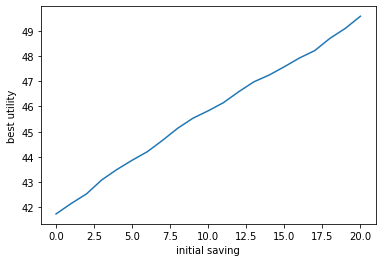

In [13]:
best_results = [best_utility(0, i, 0) for i in range(0, 21)]

plt.plot(np.arange(21), best_results)
plt.xlabel("initial saving")
_ = plt.ylabel("best utility")